In [1]:
import pandas as pd
import numpy as np

In [2]:
extrel = pd.read_sas('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\extrel.sas7bdat')
extrel.head(2)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT


In [3]:
extrel.shape

(26689, 4)

In [3]:
import datetime    # Considering the data for training before 2005/12/31
d1 = datetime.datetime(2005, 12, 31)
extrel = extrel.loc[(extrel.EXTRELSTDT < d1),['EXTRELNO','EXRELACTCD','EXTRELSTDT','EXRELDATEN']]
extrel

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT
5,b'0026431',b'FP',1992-03-01,NaT
6,b'0026431',b'CT',1999-12-01,NaT
7,b'0026443',b'FP',1992-03-01,NaT
8,b'0026444',b'FP',1992-03-01,NaT
9,b'0026446',b'FP',1992-03-01,NaT


In [4]:
import datetime     # Creating a new variable CHURN_FLAG 
d1 = datetime.datetime(2005, 12, 31)
extrel['CHURN_FLAG'] = np.where((extrel.EXRELACTCD == b'FP') & (extrel.EXRELDATEN.isnull()==True) & (extrel.EXTRELSTDT < d1) ,'0','1')
extrel

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG
0,b'0026414',b'CT',1995-02-02,NaT,1
1,b'0026419',b'FP',1992-03-01,NaT,0
2,b'0026424',b'FP',1992-03-01,1996-12-24,1
3,b'0026430',b'FP',1992-03-01,2006-01-31,1
4,b'0026430',b'CT',1997-03-07,NaT,1
5,b'0026431',b'FP',1992-03-01,NaT,0
6,b'0026431',b'CT',1999-12-01,NaT,1
7,b'0026443',b'FP',1992-03-01,NaT,0
8,b'0026444',b'FP',1992-03-01,NaT,0
9,b'0026446',b'FP',1992-03-01,NaT,0


In [5]:
communication = pd.read_sas('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\communication.sas7bdat')
communication.head(2)

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14


In [7]:
communication.shape

(763569, 7)

In [6]:
import datetime  # Considering the data for training before 2005/12/31
d2 = datetime.datetime(2005, 12, 31)
communication = communication.loc[(communication.CONTDATE < d2),['CONTID','MEDIUMCODE','MNTOPCODE','CLASCODE','EXTRELNO','CONTDIREC','CONTDATE']]
communication

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28
5,b'000767603',b'LE',b'TAX',b'ID',b'0000020',b'O',1995-02-24
6,b'000890300',b'CI',b'CTS',b'CT',b'0000020',b'O',1995-05-30
7,b'000921255',b'CI',b'CTS',b'CT',b'0000020',b'O',1995-07-03
8,b'000992863',b'CI',b'CTS',b'CT',b'0000020',b'O',1995-07-10
9,b'001047202',b'CI',b'CTS',b'CT',b'0000020',b'O',1995-08-19


In [7]:
# Grouping the donor by their ID s into one row for one donor.
communication = communication[['CONTID','MEDIUMCODE','MNTOPCODE','CLASCODE','EXTRELNO','CONTDIREC','CONTDATE']].groupby('EXTRELNO').max()
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE
EXTRELNO,,,,,,
b'0000020',b'004881673',b'RM',b'TAX',b'PM',b'O',2005-12-08
b'0000035',b'004858781',b'RM',b'TAX',b'PM',b'O',2005-11-03
b'0000042',b'003271242',b'LE',b'TAX',b'RM',b'O',2001-03-29
b'0000043',b'004373421',b'TE',b'TAX',b'RI',b'O',2004-01-23
b'0000060',b'002782523',b'TE',b'TAX',b'RI',b'O',2000-02-12


In [9]:
ph = pd.read_sas('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\payhistory.sas7bdat')
ph.head(2)

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'


In [11]:
ph.shape

(1205720, 6)

In [9]:
import datetime  # Considering the data for training before 2005/12/31
d3 = datetime.datetime(2005, 12, 31)
payhis = ph.loc[(ph.PDATE < d3),['PID','PDATE','PAMT','EXTRELNO','PAYTYPECD','STATUS']]
payhis

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'
5,128703.0,1994-06-14,0.50,b'0000020',b'D',b'OK'
6,151581.0,1994-07-05,0.50,b'0000020',b'D',b'OK'
7,182688.0,1994-08-15,0.50,b'0000020',b'D',b'OK'
8,210468.0,1994-09-23,0.50,b'0000020',b'D',b'OK'
9,235968.0,1994-10-21,0.50,b'0000020',b'D',b'OK'


In [10]:
# Grouping the donor by their IDs to get one donor per one row
payhistory = payhis[['PID','PDATE','PAMT','EXTRELNO','PAYTYPECD','STATUS']].groupby('EXTRELNO').max()
payhistory

,PID,PDATE,PAMT
EXTRELNO,,,
b'0000019',38.0,1993-12-31,9.57
b'0000020',4693740.0,2005-12-14,41.32
b'0000035',4693745.0,2005-12-14,45.85
b'0000042',2735962.0,2001-01-23,52.41
b'0000043',3783934.0,2003-07-14,53.92
b'0000060',2274884.0,1999-12-07,27.21
b'0000072',4665255.0,2005-11-17,69.00
b'0000081',4693756.0,2005-12-14,69.00
b'0000089',4693758.0,2005-12-14,41.32


In [14]:
payhistory.shape

(15945, 3)

In [13]:
extrelty = pd.read_sas('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\extrelty.sas7bdat')
extrelty

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'
5,b'CT',b'Contributor'
6,b'FR',b'Friend'
7,b'AP',b'Active Press'
8,b'SP',b'Supplier'
9,b'TR',b'Translator'


In [14]:
nameaddr = pd.read_sas('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling\\nameaddr.sas7bdat')
nameaddr

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'
5,b'0000047',b'HM',b'3360',b'NL'
6,b'0000060',b'FA',b'3600',b'NL'
7,b'0000072',b'MW',b'9000',b'NL'
8,b'0000081',b'MW',b'8902',b'NL'
9,b'0000089',b'FA',b'3600',b'NL'


In [13]:
df1 = pd.merge(extrel,nameaddr, on='EXTRELNO',how = 'inner') # merging the datasets extrel and nameaddr
df1.head(5)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0026414',b'CT',1995-02-02,NaT,1,b'MW',b'8300',b'NL'
1,b'0026419',b'FP',1992-03-01,NaT,0,b'HM',b'2600',b'NL'
2,b'0026424',b'FP',1992-03-01,1996-12-24,1,b'MW',b'1932',b'NL'
3,b'0026430',b'FP',1992-03-01,2006-01-31,1,b'HM',b'2040',b'NL'
4,b'0026430',b'CT',1997-03-07,NaT,1,b'HM',b'2040',b'NL'


In [14]:
df2 = pd.merge(communication,payhistory, on='EXTRELNO',how = 'inner')# Merging the datasets communication and pay history
df2.head(5)

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT
EXTRELNO,,,,,,,,,
b'0000020',b'004881673',b'RM',b'TAX',b'PM',b'O',2005-12-08,4693740.0,2005-12-14,41.32
b'0000035',b'004858781',b'RM',b'TAX',b'PM',b'O',2005-11-03,4693745.0,2005-12-14,45.85
b'0000042',b'003271242',b'LE',b'TAX',b'RM',b'O',2001-03-29,2735962.0,2001-01-23,52.41
b'0000043',b'004373421',b'TE',b'TAX',b'RI',b'O',2004-01-23,3783934.0,2003-07-14,53.92
b'0000060',b'002782523',b'TE',b'TAX',b'RI',b'O',2000-02-12,2274884.0,1999-12-07,27.21


In [19]:
df2.shape

(14958, 9)

In [15]:
df3 = pd.merge(df1,df2, on='EXTRELNO',how = 'inner') # Merging the above two datasets
df3.head(5)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT
0,b'0026414',b'CT',1995-02-02,NaT,1,b'MW',b'8300',b'NL',b'004696700',b'TE',b'TAX',b'RI',b'O',2005-02-03,4700457.0,2005-12-14,23.00
1,b'0026419',b'FP',1992-03-01,NaT,0,b'HM',b'2600',b'NL',b'004854376',b'RM',b'TAX',b'PM',b'O',2005-10-25,4631212.0,2005-10-04,69.00
2,b'0026424',b'FP',1992-03-01,1996-12-24,1,b'MW',b'1932',b'NL',b'001855168',b'LE',b'TAX',b'ID',b'O',1997-06-30,1088282.0,1997-01-02,20.33
3,b'0026430',b'FP',1992-03-01,2006-01-31,1,b'HM',b'2040',b'NL',b'004833236',b'TE',b'TAX',b'RI',b'O',2005-09-27,4642081.0,2005-10-18,40.65
4,b'0026430',b'CT',1997-03-07,NaT,1,b'HM',b'2040',b'NL',b'004833236',b'TE',b'TAX',b'RI',b'O',2005-09-27,4642081.0,2005-10-18,40.65


In [21]:
df3.shape

(18017, 17)

In [16]:
df = pd.merge(df3,extrelty, on='EXRELACTCD',how = 'inner') # Merging the resultant dataset with extrelty dataset
df.head(10)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT,EXRELACTDE
0,b'0026414',b'CT',1995-02-02,NaT,1,b'MW',b'8300',b'NL',b'004696700',b'TE',b'TAX',b'RI',b'O',2005-02-03,4700457.0,2005-12-14,23.00,b'Contributor'
1,b'0026430',b'CT',1997-03-07,NaT,1,b'HM',b'2040',b'NL',b'004833236',b'TE',b'TAX',b'RI',b'O',2005-09-27,4642081.0,2005-10-18,40.65,b'Contributor'
2,b'0026431',b'CT',1999-12-01,NaT,1,b'FA',b'8520',b'NL',b'004700817',b'RM',b'TAX',b'PM',b'O',2005-02-10,4480400.0,2005-04-26,276.00,b'Contributor'
3,b'0026447',b'CT',1995-02-02,NaT,1,b'HM',b'2860',b'NL',b'004809129',b'RM',b'TAX',b'PM',b'O',2005-08-09,4700466.0,2005-12-14,23.00,b'Contributor'
4,b'0026470',b'CT',1992-03-01,NaT,1,b'HR',b'2600',b'NL',b'004882587',b'TE',b'VIS',b'RI',b'O',2005-12-09,4700472.0,2005-12-14,69.00,b'Contributor'
5,b'0026472',b'CT',1992-03-01,NaT,1,b'HM',b'3461',b'NL',b'004879382',b'RM',b'TAX',b'PM',b'O',2005-12-06,4481067.0,2005-04-30,276.00,b'Contributor'
6,b'0026486',b'CT',2001-01-25,NaT,1,b'HR',b'3140',b'NL',b'004885343',b'RM',b'TAX',b'PM',b'O',2005-12-14,4700475.0,2005-12-14,23.00,b'Contributor'
7,b'0026495',b'CT',1995-02-02,NaT,1,b'HR',b'8511',b'NL',b'004787657',b'RM',b'TAX',b'PM',b'O',2005-07-01,4700478.0,2005-12-14,23.00,b'Contributor'
8,b'0026501',b'CT',2005-02-01,NaT,1,b'HR',b'8210',b'NL',b'004883142',b'RM',b'TAX',b'PM',b'O',2005-12-12,4700480.0,2005-12-14,23.00,b'Contributor'
9,b'0026506',b'CT',2004-11-01,NaT,1,b'HR',b'1880',b'NL',b'004750116',b'RM',b'TAX',b'RI',b'O',2005-04-22,4258091.0,2004-11-04,23.00,b'Contributor'


In [23]:
df.shape

(18017, 18)

In [24]:
df.columns

Index(['EXTRELNO', 'EXRELACTCD', 'EXTRELSTDT', 'EXRELDATEN', 'CHURN_FLAG',
       'NAME1TITLE', 'POSTCODE', 'LANGUACODE', 'CONTID', 'MEDIUMCODE',
       'MNTOPCODE', 'CLASCODE', 'CONTDIREC', 'CONTDATE', 'PID', 'PDATE',
       'PAMT', 'EXRELACTDE'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18017 entries, 0 to 18016
Data columns (total 18 columns):
EXTRELNO      18017 non-null object
EXRELACTCD    18017 non-null object
EXTRELSTDT    18017 non-null datetime64[ns]
EXRELDATEN    9160 non-null datetime64[ns]
CHURN_FLAG    18017 non-null object
NAME1TITLE    17589 non-null object
POSTCODE      17941 non-null object
LANGUACODE    18017 non-null object
CONTID        18017 non-null object
MEDIUMCODE    18017 non-null object
MNTOPCODE     18017 non-null object
CLASCODE      18017 non-null object
CONTDIREC     18017 non-null object
CONTDATE      18017 non-null datetime64[ns]
PID           18017 non-null float64
PDATE         18017 non-null datetime64[ns]
PAMT          18017 non-null float64
EXRELACTDE    18017 non-null object
dtypes: datetime64[ns](4), float64(2), object(12)
memory usage: 2.6+ MB


In [185]:
df.shape

(18017, 18)

In [26]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['PID', 'PAMT']
['EXTRELNO', 'EXRELACTCD', 'CHURN_FLAG', 'NAME1TITLE', 'POSTCODE', 'LANGUACODE', 'CONTID', 'MEDIUMCODE', 'MNTOPCODE', 'CLASCODE', 'CONTDIREC', 'EXRELACTDE']


In [27]:
df_num=df[numeric_var_names]
df_num.head(5)

,PID,PAMT
0,4700457.0,23.00
1,4642081.0,40.65
2,4480400.0,276.00
3,4700466.0,23.00
4,4700472.0,69.00


In [28]:
df_cat = df[cat_var_names]
df_cat.head(5)

,EXTRELNO,EXRELACTCD,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,EXRELACTDE
0,b'0026414',b'CT',1,b'MW',b'8300',b'NL',b'004696700',b'TE',b'TAX',b'RI',b'O',b'Contributor'
1,b'0026430',b'CT',1,b'HM',b'2040',b'NL',b'004833236',b'TE',b'TAX',b'RI',b'O',b'Contributor'
2,b'0026431',b'CT',1,b'FA',b'8520',b'NL',b'004700817',b'RM',b'TAX',b'PM',b'O',b'Contributor'
3,b'0026447',b'CT',1,b'HM',b'2860',b'NL',b'004809129',b'RM',b'TAX',b'PM',b'O',b'Contributor'
4,b'0026470',b'CT',1,b'HR',b'2600',b'NL',b'004882587',b'TE',b'VIS',b'RI',b'O',b'Contributor'


In [29]:
# Creating Data audit Report

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df_num.apply(lambda x: var_summary(x)).T

In [30]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
PID,18017.0,0.0,7.266615e+10,4.033199e+06,4690315.00,1.172134e+06,1.373898e+12,40859.0,363709.80,1182546.20,2047780.4,3758992.0,4690315.00,4707922.0,4713597.80,4716043.2,4717916.0,4718395.00
PAMT,18017.0,0.0,1.370471e+06,7.606545e+01,40.66,9.034939e+01,8.163013e+03,-138.0,20.33,20.33,23.0,23.0,40.66,69.0,243.93,276.0,276.0,2195.35


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling  

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\Sony\Anaconda4\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\Sony\Anac

<Figure size 720x540 with 0 Axes>

In [125]:
pandas_profiling.ProfileReport(df)

Number of variables,18
Number of observations,18017
Total Missing (%),2.9%
Total size in memory,2.6 MiB
Average record size in memory,152.0 B
Numeric,2
Categorical,12
Boolean,0
Date,4
Text (Unique),0
Rejected,0


In [32]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

df_num=df_num.apply(lambda x: outlier_capping(x))

In [33]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

df_num=df_num.apply(lambda x: Missing_imputation(x))

In [191]:
df.corr()

,PID,PAMT
PID,1.000000,-0.015726
PAMT,-0.015726,1.000000


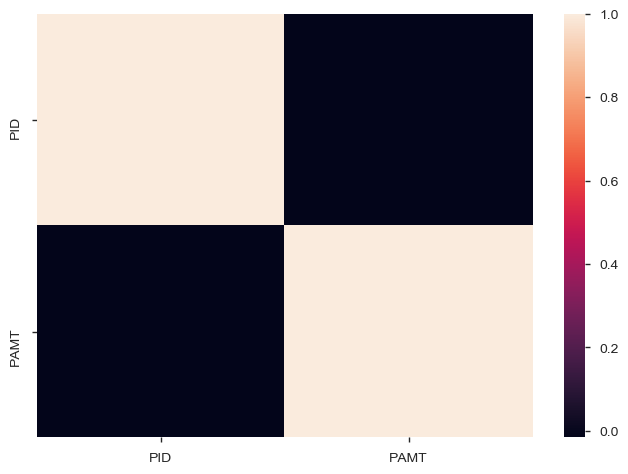

In [133]:
sns.heatmap(df.corr())

In [192]:
df.columns

Index(['EXTRELNO', 'EXRELACTCD', 'EXTRELSTDT', 'EXRELDATEN', 'CHURN_FLAG',
       'NAME1TITLE', 'POSTCODE', 'LANGUACODE', 'CONTID', 'MEDIUMCODE',
       'MNTOPCODE', 'CLASCODE', 'CONTDIREC', 'CONTDATE', 'PID', 'PDATE',
       'PAMT', 'EXRELACTDE'],
      dtype='object')

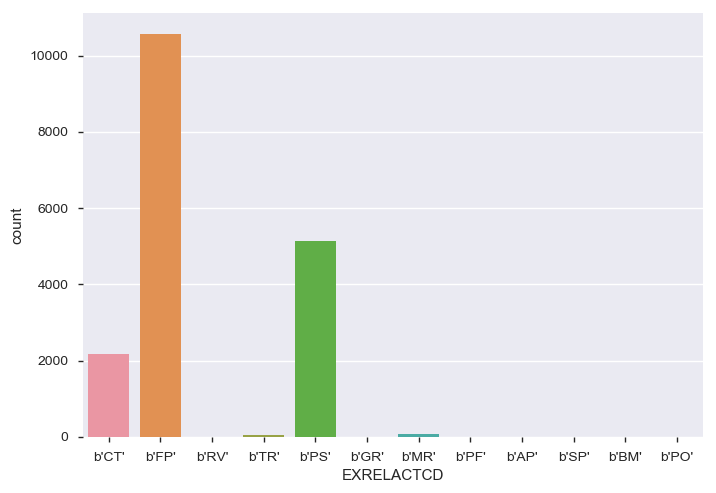

In [135]:
sns.countplot(x = "EXRELACTCD", data=df)
plt.show()

#### High b'FP shows that there are high number of active customers

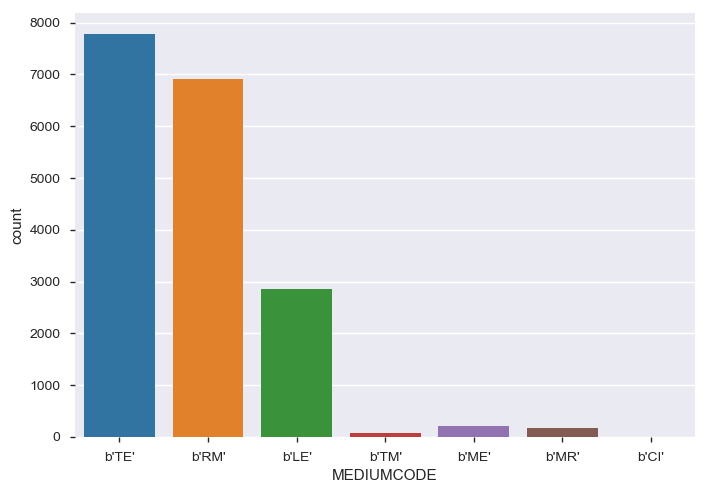

In [138]:
sns.countplot(x = "MEDIUMCODE", data=df)
plt.show()

#### High b'TE' represents the medium of contact

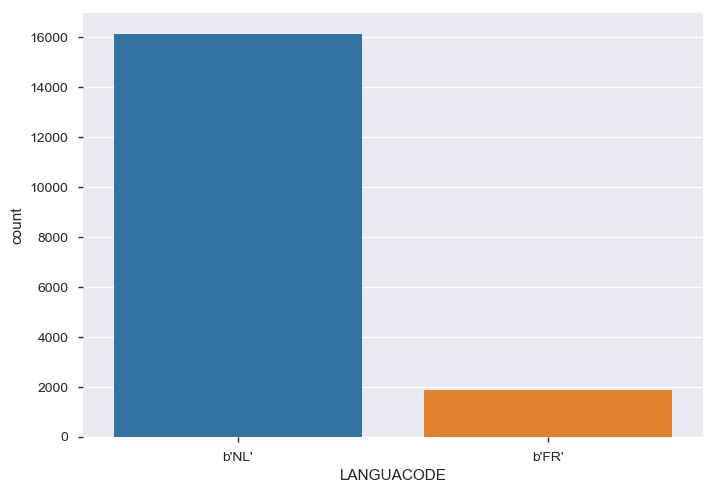

In [139]:
sns.countplot(x = 'LANGUACODE', data=df)
plt.show()

#### b'NL' is the most preferred mailing language.

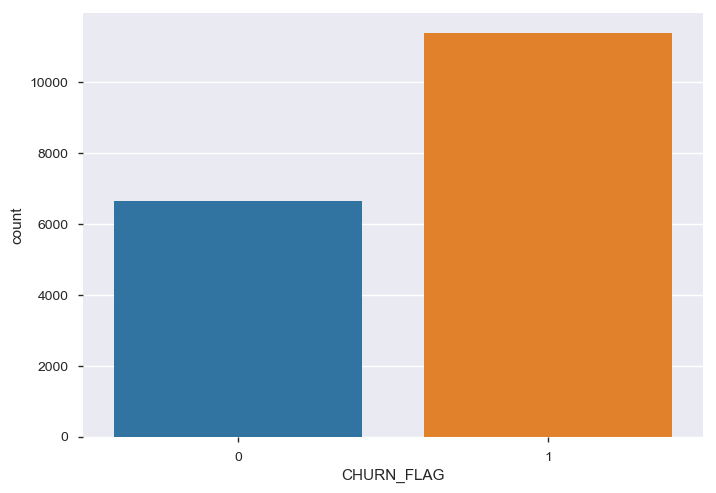

In [140]:
sns.countplot(x = "CHURN_FLAG", data=df)
plt.show()

#### The dependent variable - churn_flag shows there are more churn customers.

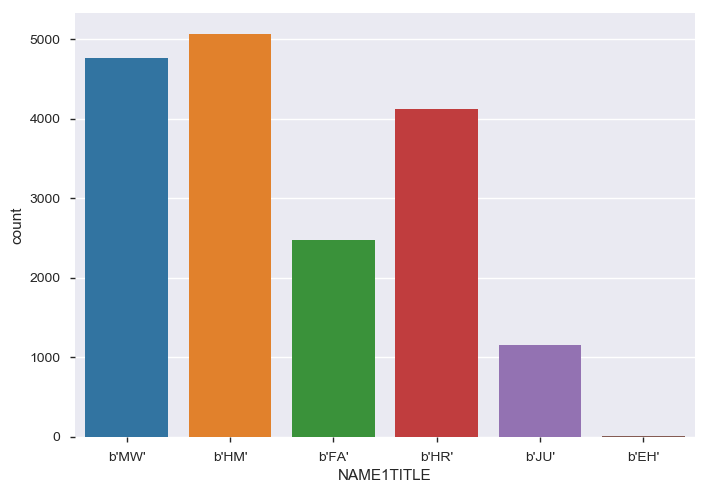

In [141]:
sns.countplot(x = "NAME1TITLE", data=df)
plt.show()

#### b'HM' is the mostly used title to address the donors followed by b'MW'

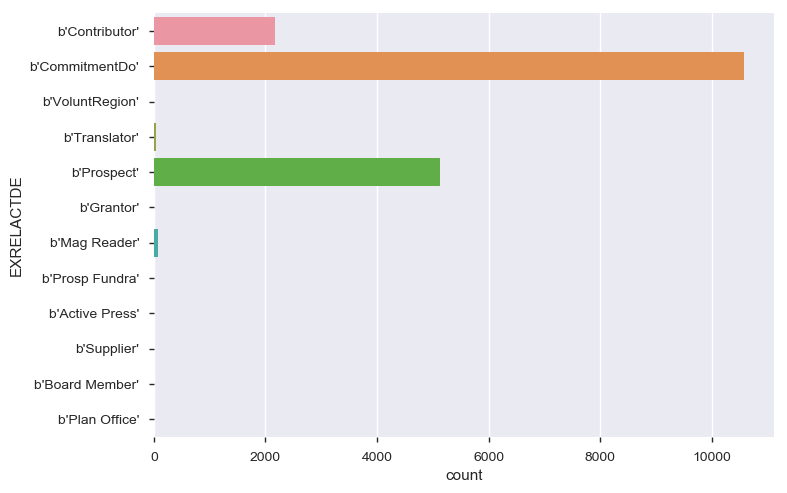

In [144]:
sns.countplot(y = 'EXRELACTDE',data=df)
plt.show()

#### High no. of donors has b'Commitment as description of the activity

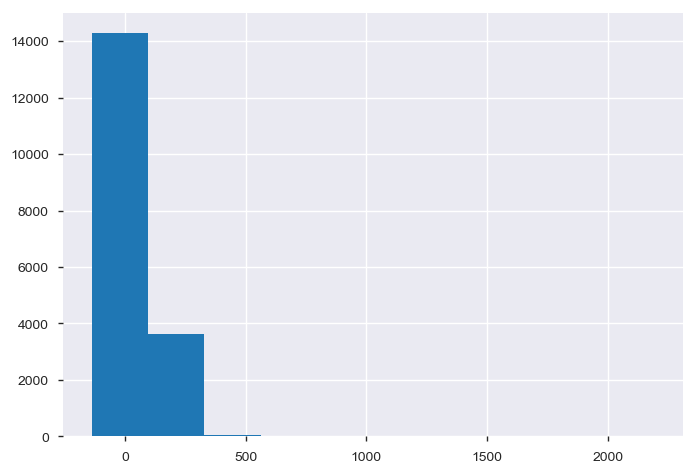

In [146]:
df.PAMT.hist()

#### We observed that the payment amount is highly skewed

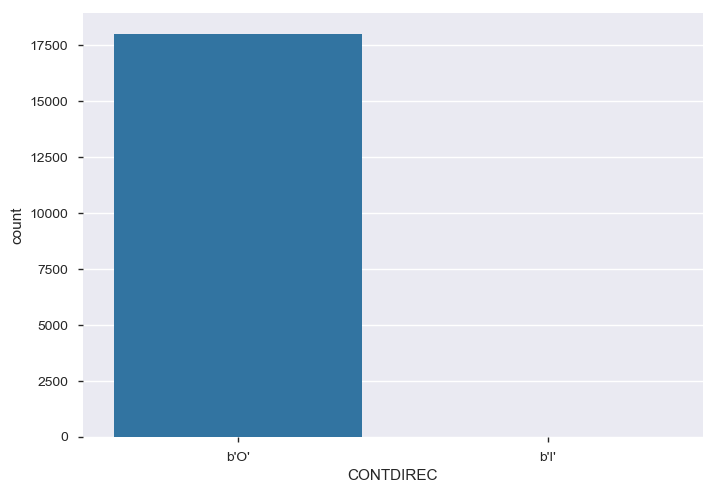

In [147]:
sns.countplot(x = 'CONTDIREC',data=df)
plt.show()

#### It shows the direction of communication is only outgoing - b'O'

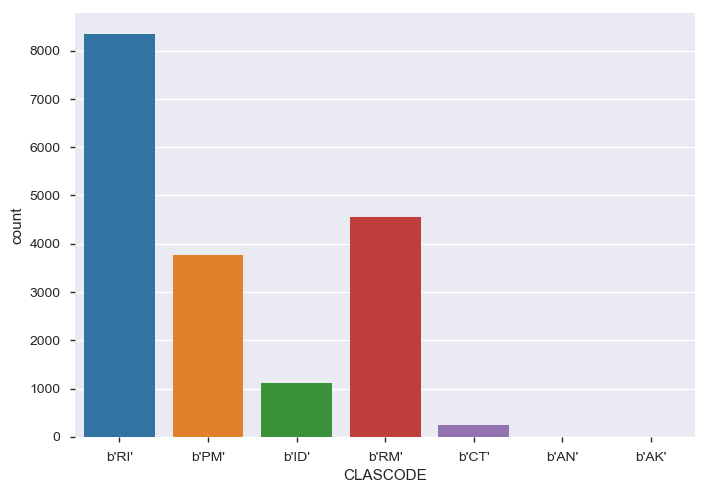

In [148]:
sns.countplot(x = 'CLASCODE',data=df)
plt.show()        

#### b'RI' has the highest code of the contact 

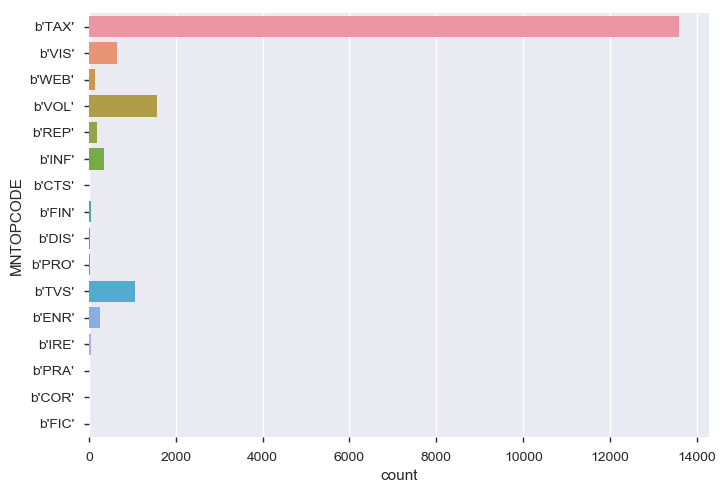

In [150]:
sns.countplot(y = 'MNTOPCODE',data=df)
plt.show()

#### b'TAX' is the highest main topic code

Text(0,0.5,'CHURN_FLAG')

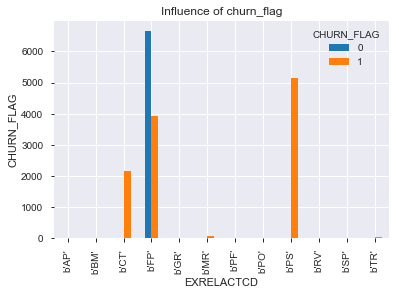

In [151]:
%matplotlib inline
pd.crosstab(df.EXRELACTCD,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('EXRELACTCD')
plt.ylabel('CHURN_FLAG')


#### We understand that the active donor would have the code as b'FP'

Text(0,0.5,'CHURN_FLAG')

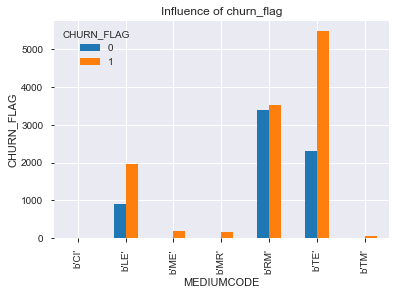

In [152]:
%matplotlib inline
pd.crosstab(df.MEDIUMCODE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('MEDIUMCODE')
plt.ylabel('CHURN_FLAG')


#### High number of churn donors have mediumcode of b'TE'

Text(0,0.5,'CHURN_FLAG')

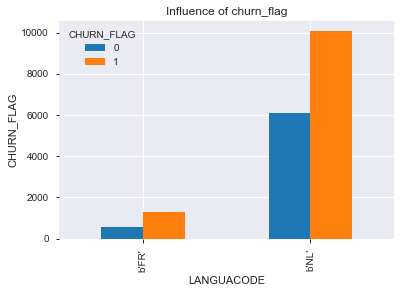

In [153]:
%matplotlib inline
pd.crosstab(df.LANGUACODE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('LANGUACODE')
plt.ylabel('CHURN_FLAG')

#### Mostly used language code has high number of churn and active donors. However churn are more.

Text(0,0.5,'CHURN_FLAG')

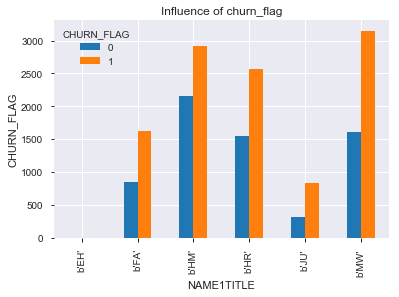

In [154]:
%matplotlib inline
pd.crosstab(df.NAME1TITLE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('NAME1TITLE')
plt.ylabel('CHURN_FLAG')

#### Suprisingly, b'MW' name title has high no. of active and churn donors

Text(0,0.5,'CHURN_FLAG')

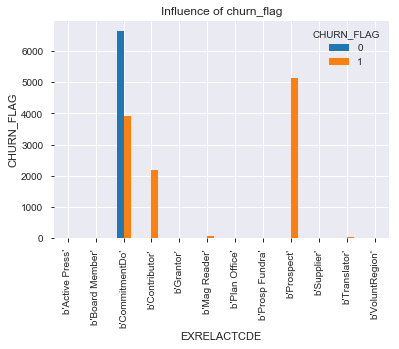

In [155]:
%matplotlib inline
pd.crosstab(df.EXRELACTDE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('EXRELACTCDE')
plt.ylabel('CHURN_FLAG')


#### We understand that the active donors would have exrelactde will have high number of b'commitmentDo

Text(0,0.5,'CHURN_FLAG')

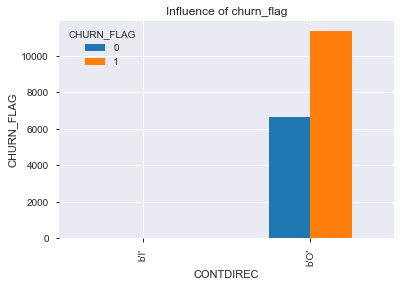

In [156]:
%matplotlib inline
pd.crosstab(df.CONTDIREC,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('CONTDIREC')
plt.ylabel('CHURN_FLAG')

#### The outgoing calls has high churn donors

Text(0,0.5,'CHURN_FLAG')

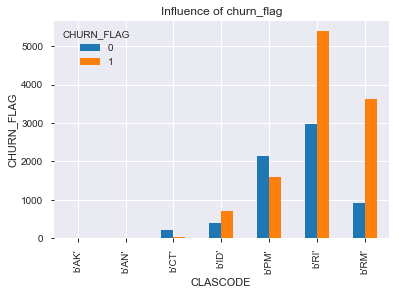

In [157]:
%matplotlib inline
pd.crosstab(df.CLASCODE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('CLASCODE')
plt.ylabel('CHURN_FLAG')

#### b'RI' is the mostly used code of contact which is high for churn and sctive donors.

Text(0,0.5,'CHURN_FLAG')

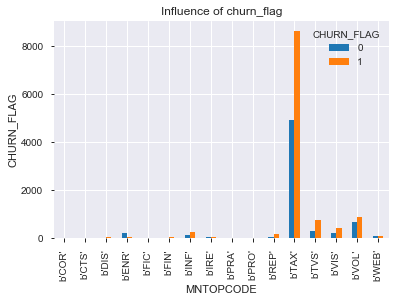

In [158]:
%matplotlib inline
pd.crosstab(df.MNTOPCODE,df.CHURN_FLAG).plot(kind='bar')
plt.title('Influence of churn_flag')
plt.xlabel('MNTOPCODE')
plt.ylabel('CHURN_FLAG')

#### b'TAX' main topic code has high number of churn and active donors.

In [19]:
# Dropping the unneccesary variables which has high cardinality
df.drop(df[['EXTRELNO','EXTRELSTDT','EXRELDATEN','CONTID','CONTDATE','POSTCODE','PID','PDATE',]],axis = 1,inplace = True)

In [117]:
df.columns

Index(['EXRELACTCD', 'CHURN_FLAG', 'NAME1TITLE', 'LANGUACODE', 'MEDIUMCODE',
       'MNTOPCODE', 'CLASCODE', 'CONTDIREC', 'PAMT', 'EXRELACTDE'],
      dtype='object')

In [20]:
#Create dummy variables

cat_vars=['EXRELACTCD','NAME1TITLE','LANGUACODE','MEDIUMCODE','MNTOPCODE','CLASCODE','CONTDIREC','EXRELACTDE']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['EXRELACTCD','NAME1TITLE','LANGUACODE','MEDIUMCODE','MNTOPCODE','CLASCODE','CONTDIREC','EXRELACTDE']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [21]:
df_final=df[to_keep]
df_final.columns

Index(['CHURN_FLAG', 'PAMT', 'EXRELACTCD_b'AP'', 'EXRELACTCD_b'BM'',
       'EXRELACTCD_b'CT'', 'EXRELACTCD_b'FP'', 'EXRELACTCD_b'GR'',
       'EXRELACTCD_b'MR'', 'EXRELACTCD_b'PF'', 'EXRELACTCD_b'PO'',
       'EXRELACTCD_b'PS'', 'EXRELACTCD_b'RV'', 'EXRELACTCD_b'SP'',
       'EXRELACTCD_b'TR'', 'NAME1TITLE_b'EH'', 'NAME1TITLE_b'FA'',
       'NAME1TITLE_b'HM'', 'NAME1TITLE_b'HR'', 'NAME1TITLE_b'JU'',
       'NAME1TITLE_b'MW'', 'LANGUACODE_b'FR'', 'LANGUACODE_b'NL'',
       'MEDIUMCODE_b'CI'', 'MEDIUMCODE_b'LE'', 'MEDIUMCODE_b'ME'',
       'MEDIUMCODE_b'MR'', 'MEDIUMCODE_b'RM'', 'MEDIUMCODE_b'TE'',
       'MEDIUMCODE_b'TM'', 'MNTOPCODE_b'COR'', 'MNTOPCODE_b'CTS'',
       'MNTOPCODE_b'DIS'', 'MNTOPCODE_b'ENR'', 'MNTOPCODE_b'FIC'',
       'MNTOPCODE_b'FIN'', 'MNTOPCODE_b'INF'', 'MNTOPCODE_b'IRE'',
       'MNTOPCODE_b'PRA'', 'MNTOPCODE_b'PRO'', 'MNTOPCODE_b'REP'',
       'MNTOPCODE_b'TAX'', 'MNTOPCODE_b'TVS'', 'MNTOPCODE_b'VIS'',
       'MNTOPCODE_b'VOL'', 'MNTOPCODE_b'WEB'', 'CLASCODE_b'A

In [22]:
df_final_vars=df_final.columns.values.tolist()
y=["CHURN_FLAG"]
X=[i for i in df_final_vars if i not in y]

In [23]:
df_final.columns

Index(['CHURN_FLAG', 'PAMT', 'EXRELACTCD_b'AP'', 'EXRELACTCD_b'BM'',
       'EXRELACTCD_b'CT'', 'EXRELACTCD_b'FP'', 'EXRELACTCD_b'GR'',
       'EXRELACTCD_b'MR'', 'EXRELACTCD_b'PF'', 'EXRELACTCD_b'PO'',
       'EXRELACTCD_b'PS'', 'EXRELACTCD_b'RV'', 'EXRELACTCD_b'SP'',
       'EXRELACTCD_b'TR'', 'NAME1TITLE_b'EH'', 'NAME1TITLE_b'FA'',
       'NAME1TITLE_b'HM'', 'NAME1TITLE_b'HR'', 'NAME1TITLE_b'JU'',
       'NAME1TITLE_b'MW'', 'LANGUACODE_b'FR'', 'LANGUACODE_b'NL'',
       'MEDIUMCODE_b'CI'', 'MEDIUMCODE_b'LE'', 'MEDIUMCODE_b'ME'',
       'MEDIUMCODE_b'MR'', 'MEDIUMCODE_b'RM'', 'MEDIUMCODE_b'TE'',
       'MEDIUMCODE_b'TM'', 'MNTOPCODE_b'COR'', 'MNTOPCODE_b'CTS'',
       'MNTOPCODE_b'DIS'', 'MNTOPCODE_b'ENR'', 'MNTOPCODE_b'FIC'',
       'MNTOPCODE_b'FIN'', 'MNTOPCODE_b'INF'', 'MNTOPCODE_b'IRE'',
       'MNTOPCODE_b'PRA'', 'MNTOPCODE_b'PRO'', 'MNTOPCODE_b'REP'',
       'MNTOPCODE_b'TAX'', 'MNTOPCODE_b'TVS'', 'MNTOPCODE_b'VIS'',
       'MNTOPCODE_b'VOL'', 'MNTOPCODE_b'WEB'', 'CLASCODE_b'A

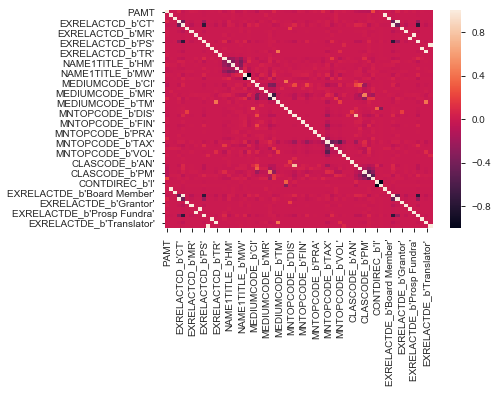

In [208]:
sns.heatmap(df_final.corr())
plt.show()

### Implementing the model

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [106]:
# RFE (Recursive Feature Selection) is used to reduce the number of variables.
rfe = RFE(logreg, 18)
rfe = rfe.fit(df_final[X], df_final[y])

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be cha

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [107]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True False False False False  True False False
 False False False False False False False  True  True False False  True
  True False False False False  True  True False False False False False
  True False False False False False False  True False False False  True
 False  True  True  True False False False  True  True False False False
 False  True False False False]
[45 35 40  1  1 47  9 30 41  1 36 43 21 25 23 46 24 18 19  1  1  5 38  1
  1  2 14 28 33  1  1 13 17 32  6  7  1 12 15 29 27 10  8  1 20 26  3  1
 16  1  1  1 11 34 39  1  1 48  4 42 31  1 44 22 37]


In [24]:
# The below variables are selected by the RFE method. 
cols = ["EXRELACTDE_b'Prospect'","EXRELACTDE_b'Contributor'","EXRELACTDE_b'CommitmentDo'","CLASCODE_b'RI'",
        "CLASCODE_b'ID'","MNTOPCODE_b'DIS'","MNTOPCODE_b'CTS'","MEDIUMCODE_b'MR'","MEDIUMCODE_b'ME'","LANGUACODE_b'FR'",
        "LANGUACODE_b'NL'","EXRELACTCD_b'PS'","EXRELACTCD_b'CT'", "EXRELACTCD_b'FP'"]
X=df_final[cols]
y=df_final['CHURN_FLAG']

### Preparing the test data ie; from 2006 - 2007 years data

In [3]:
import datetime
d4 = datetime.datetime(2005, 12, 31)
extrel_test = extrel.loc[(extrel.EXTRELSTDT > d4),['EXTRELNO','EXRELACTCD','EXTRELSTDT','EXRELDATEN']]
extrel_test.head(2)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
2624,b'0035969',b'FP',2006-02-01,2007-01-12
2625,b'0035969',b'FP',2007-02-01,NaT


In [4]:
extrel_test['CHURN_FLAG'] = np.where((extrel_test.EXRELACTCD == b'FP') & (extrel_test.EXRELDATEN.isnull()==True) & (extrel_test.EXTRELSTDT > d4) ,'0','1')
extrel_test.head(2)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG
2624,b'0035969',b'FP',2006-02-01,2007-01-12,1
2625,b'0035969',b'FP',2007-02-01,NaT,0


In [7]:
import datetime
d5 = datetime.datetime(2005, 12, 31)
comm_test = communication.loc[(communication.CONTDATE > d5),['CONTID','MEDIUMCODE','MNTOPCODE','CLASCODE','EXTRELNO','CONTDIREC','CONTDATE']]
comm_test.head(2)

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
50,b'004928679',b'CI',b'CTS',b'CT',b'0000020',b'O',2006-02-27
51,b'004935655',b'LE',b'TAX',b'ID',b'0000020',b'O',2006-03-09


In [8]:
comm_test = comm_test[['CONTID','MEDIUMCODE','MNTOPCODE','CLASCODE','EXTRELNO','CONTDIREC','CONTDATE']].groupby('EXTRELNO').max()
comm_test.head(2)

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE
EXTRELNO,,,,,,
b'0000020',b'005075715',b'LE',b'TAX',b'ID',b'O',2006-08-10
b'0000035',b'005100553',b'LE',b'TAX',b'ID',b'O',2006-10-03


In [10]:
import datetime
d6 = datetime.datetime(2005, 12, 31)
pay_test = ph.loc[(ph.PDATE > d6),['PID','PDATE','PAMT','EXTRELNO','PAYTYPECD','STATUS']]
pay_test.head(2)

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
146,4723270.0,2006-01-12,23.0,b'0000020',b'D',b'OK'
147,4752343.0,2006-02-10,23.0,b'0000020',b'D',b'OK'


In [11]:
pay_test = pay_test[['PID','PDATE','PAMT','EXTRELNO','PAYTYPECD','STATUS']].groupby('EXTRELNO').max()
pay_test.head(2)

,PID,PDATE,PAMT,PAYTYPECD,STATUS
EXTRELNO,,,,,
b'0000020',5080067.0,2007-01-17,25.0,b'D',b'OK'
b'0000035',5080071.0,2007-01-17,25.0,b'D',b'OK'


In [15]:
df1_test = pd.merge(extrel_test,nameaddr, on='EXTRELNO',how = 'inner')
df1_test.head(5)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0035969',b'FP',2006-02-01,2007-01-12,1,b'HM',b'9130',b'NL'
1,b'0035969',b'FP',2007-02-01,NaT,0,b'HM',b'9130',b'NL'
2,b'0036305',b'FP',2006-09-01,NaT,0,NaN,b'8870',b'NL'
3,b'0037786',b'FP',2006-03-01,NaT,0,b'HM',b'9880',b'NL'
4,b'0038595',b'FP',2006-05-01,2007-01-12,1,b'HM',b'2620',b'NL'


In [16]:
df2_test = pd.merge(comm_test,pay_test, on='EXTRELNO',how = 'inner')
df2_test.head(5)

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT,PAYTYPECD,STATUS
EXTRELNO,,,,,,,,,,,
b'0000020',b'005075715',b'LE',b'TAX',b'ID',b'O',2006-08-10,5080067.0,2007-01-17,25.0,b'D',b'OK'
b'0000035',b'005100553',b'LE',b'TAX',b'ID',b'O',2006-10-03,5080071.0,2007-01-17,25.0,b'D',b'OK'
b'0000072',b'005103306',b'LE',b'TAX',b'ID',b'O',2006-10-05,5018962.0,2006-11-10,69.0,b'D',b'OK'
b'0000081',b'005155686',b'LE',b'TAX',b'ID',b'O',2006-12-26,5048404.0,2006-12-08,69.0,b'D',b'OK'
b'0000089',b'005118172',b'LE',b'TAX',b'ID',b'O',2006-10-31,5080080.0,2007-01-17,25.0,b'D',b'OK'


In [17]:
df3_test = pd.merge(df1_test,df2_test, on='EXTRELNO',how = 'inner')
df3_test.head(5)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT,PAYTYPECD,STATUS
0,b'0035969',b'FP',2006-02-01,2007-01-12,1,b'HM',b'9130',b'NL',b'005174893',b'TE',b'TAX',b'RI',b'O',2007-01-24,4959814.0,2006-09-08,46.0,b'E',b'OK'
1,b'0035969',b'FP',2007-02-01,NaT,0,b'HM',b'9130',b'NL',b'005174893',b'TE',b'TAX',b'RI',b'O',2007-01-24,4959814.0,2006-09-08,46.0,b'E',b'OK'
2,b'0036305',b'FP',2006-09-01,NaT,0,NaN,b'8870',b'NL',b'005167981',b'TE',b'TAX',b'RI',b'O',2007-01-16,5088935.0,2007-01-17,69.0,b'D',b'OK'
3,b'0037786',b'FP',2006-03-01,NaT,0,b'HM',b'9880',b'NL',b'005141562',b'TE',b'TAX',b'RI',b'O',2006-12-01,5057600.0,2006-12-08,69.0,b'D',b'OK'
4,b'0038595',b'FP',2006-05-01,2007-01-12,1,b'HM',b'2620',b'NL',b'005175097',b'MR',b'ENR',b'ID',b'O',2007-01-25,4895151.0,2006-06-23,69.0,b'E',b'OK'


In [18]:
df_test = pd.merge(df3_test,extrelty, on='EXRELACTCD',how = 'inner')
df_test.head(10)

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,CHURN_FLAG,NAME1TITLE,POSTCODE,LANGUACODE,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,CONTDIREC,CONTDATE,PID,PDATE,PAMT,PAYTYPECD,STATUS,EXRELACTDE
0,b'0035969',b'FP',2006-02-01,2007-01-12,1,b'HM',b'9130',b'NL',b'005174893',b'TE',b'TAX',b'RI',b'O',2007-01-24,4959814.0,2006-09-08,46.0,b'E',b'OK',b'CommitmentDo'
1,b'0035969',b'FP',2007-02-01,NaT,0,b'HM',b'9130',b'NL',b'005174893',b'TE',b'TAX',b'RI',b'O',2007-01-24,4959814.0,2006-09-08,46.0,b'E',b'OK',b'CommitmentDo'
2,b'0036305',b'FP',2006-09-01,NaT,0,NaN,b'8870',b'NL',b'005167981',b'TE',b'TAX',b'RI',b'O',2007-01-16,5088935.0,2007-01-17,69.0,b'D',b'OK',b'CommitmentDo'
3,b'0037786',b'FP',2006-03-01,NaT,0,b'HM',b'9880',b'NL',b'005141562',b'TE',b'TAX',b'RI',b'O',2006-12-01,5057600.0,2006-12-08,69.0,b'D',b'OK',b'CommitmentDo'
4,b'0038595',b'FP',2006-05-01,2007-01-12,1,b'HM',b'2620',b'NL',b'005175097',b'MR',b'ENR',b'ID',b'O',2007-01-25,4895151.0,2006-06-23,69.0,b'E',b'OK',b'CommitmentDo'
5,b'0180118',b'FP',2006-04-01,NaT,0,b'HR',b'1060',b'FR',b'005140221',b'TE',b'TAX',b'RI',b'O',2006-11-30,5076894.0,2007-01-05,25.0,b'E',b'OK',b'CommitmentDo'
6,b'0184840',b'FP',2006-09-01,NaT,0,b'MW',b'2440',b'NL',b'005155082',b'TE',b'FIN',b'RI',b'O',2006-12-22,5092346.0,2007-01-17,25.0,b'D',b'OK',b'CommitmentDo'
7,b'0185852',b'FP',2006-02-01,NaT,0,b'HR',b'2610',b'NL',b'005145975',b'LE',b'TAX',b'RI',b'O',2006-12-08,5073409.0,2006-12-28,69.0,b'E',b'OK',b'CommitmentDo'
8,b'0194239',b'FP',2006-01-01,NaT,0,b'HR',b'2800',b'NL',b'005150067',b'LE',b'VOL',b'CT',b'O',2006-12-14,5093197.0,2007-01-17,25.0,b'E',b'OK',b'CommitmentDo'
9,b'0201571',b'FP',2006-03-01,NaT,0,b'HR',b'9240',b'NL',b'005097557',b'LE',b'TAX',b'ID',b'O',2006-09-28,4958243.0,2006-09-05,138.0,b'E',b'OK',b'CommitmentDo'


In [19]:
df_test.shape

(442, 20)

In [20]:
df_test.columns

Index(['EXTRELNO', 'EXRELACTCD', 'EXTRELSTDT', 'EXRELDATEN', 'CHURN_FLAG',
       'NAME1TITLE', 'POSTCODE', 'LANGUACODE', 'CONTID', 'MEDIUMCODE',
       'MNTOPCODE', 'CLASCODE', 'CONTDIREC', 'CONTDATE', 'PID', 'PDATE',
       'PAMT', 'PAYTYPECD', 'STATUS', 'EXRELACTDE'],
      dtype='object')

In [21]:
# Dropping the unnecessary variables from the test data.
df_test.drop(df_test[['EXTRELNO','EXTRELSTDT','EXRELDATEN','POSTCODE','CONTID','CONTDATE','PID','PDATE','PAYTYPECD','STATUS']],axis = 1,inplace = True)

In [53]:
# Applying the model on the test data. X,y are for train data and X1,y1 are for test data.
X1=df_test[cols]
y1=df_test['CHURN_FLAG']

In [25]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_scaled=pd.DataFrame(sc.fit_transform(X))

X_scaled # Scaled values for trained data

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.631534,2.703071,-1.192598,1.075376,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
1,-0.631534,2.703071,-1.192598,1.075376,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
2,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
3,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
4,-0.631534,2.703071,-1.192598,1.075376,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
5,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
6,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
7,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
8,-0.631534,2.703071,-1.192598,-0.929907,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598
9,-0.631534,2.703071,-1.192598,1.075376,-0.256843,-0.038741,-0.025816,-0.100174,-0.10675,-0.340310,0.340310,-0.631534,2.703071,-1.192598


In [54]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X1_scaled=pd.DataFrame(sc.fit_transform(X1))

X1_scaled # Scaled values for test data.

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
1,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
2,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
3,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
4,-0.426401,-0.047619,0.444783,-0.817266,1.898464,-0.047619,-0.152145,8.524475,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
5,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,3.920506,-3.920506,-0.426401,-0.047619,0.444783
6,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
7,-0.426401,-0.047619,0.444783,1.223591,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
8,-0.426401,-0.047619,0.444783,-0.817266,-0.526742,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783
9,-0.426401,-0.047619,0.444783,-0.817266,1.898464,-0.047619,-0.152145,-0.117309,-0.082666,-0.255069,0.255069,-0.426401,-0.047619,0.444783


In [58]:
# we have already splitted our train and test data. So we are just assigning them.
X_train = X_scaled
y_train = y
X1_test = X1_scaled
y1_test = y1

### KNN model

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [61]:
tuned_parameters = [{'n_neighbors': [1,3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [62]:
knn_clf.fit(X_train, y_train )

knn_clf.best_score_

0.7248154520730421

In [63]:
knn_clf.best_params_

{'n_neighbors': 11}

In [64]:
#Building for the n_neighbors=11
knn_clf = KNeighborsClassifier( n_neighbors = 11)

In [65]:
knn_clf.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [66]:
knn_cm = metrics.confusion_matrix( y1_test, knn_clf.predict( X1_test ) )

Text(0.5,15,'Predicted label')

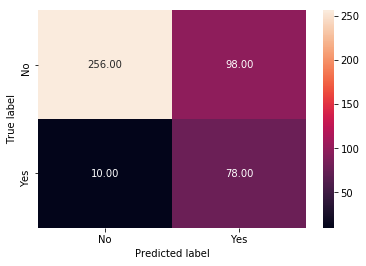

In [67]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [68]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y1_test, knn_clf.predict( X1_test )))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83       354
           1       0.44      0.89      0.59        88

   micro avg       0.76      0.76      0.76       442
   macro avg       0.70      0.80      0.71       442
weighted avg       0.86      0.76      0.78       442



In [70]:
accuracy=metrics.accuracy_score( y1_test, knn_clf.predict( X1_test ) )

print("KNN model accuracy: %.3f" % (accuracy))

KNN model accuracy: 0.756


### From the classification Report we see that the precision and recall values are good. We also got accuracy of 75%.Hence our model worked well.

### Observations made by Exploratory Analysis
#### Large donors use b'TE' as mediumcode but it has high churns.So b'RM' is better with high active donors
#### Most donors use b'RI' as class of contact but it records high churns. b'PM' class code is much better than that.
#### The donors with activity code 'bCommitmentDo' are highly active.
### Eventhough their may be many reasons for the donors to be churn, these are some of the them.